In [1]:
from matplotlib import pyplot as plt
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_whar_cfg

In [2]:
cfg = get_whar_cfg(WHARDatasetID.UCI_HAR)
dataset = PytorchAdapter(cfg, override_cache=False)

Creating config hash...
Checking download...
Download exists.
Checking sessions...
Sessions exist.
Validating common format...
[########################################] | 100% Completed | 651.90 ms
Common format validated.
Checking windowing...
Loading config hash...
Windowing exists.
subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
activity_ids: [0 1 2 3 4 5]


In [3]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(
    train_batch_size=32, override_cache=False, scv_group_index=2
)

Loading windows: 100%|██████████| 9499/9499 [00:06<00:00, 1455.48it/s]


Getting normalization parameters...


Transforming windows: 100%|██████████| 9499/9499 [00:01<00:00, 6001.04it/s]

train: 7046 | val: 782 | test: 1671


In [4]:
weights = dataset.get_class_weights(test_loader)
print(weights)

{2: 0.6968517014613271, 0: 0.7306023536688557, 1: 0.7724139341499047, 3: 1.0257657045510735, 5: 1.3496917165145703, 4: 1.4246745896542687}


torch.Size([32]) torch.Size([32, 9, 5, 64]) torch.Size([32, 9, 5])


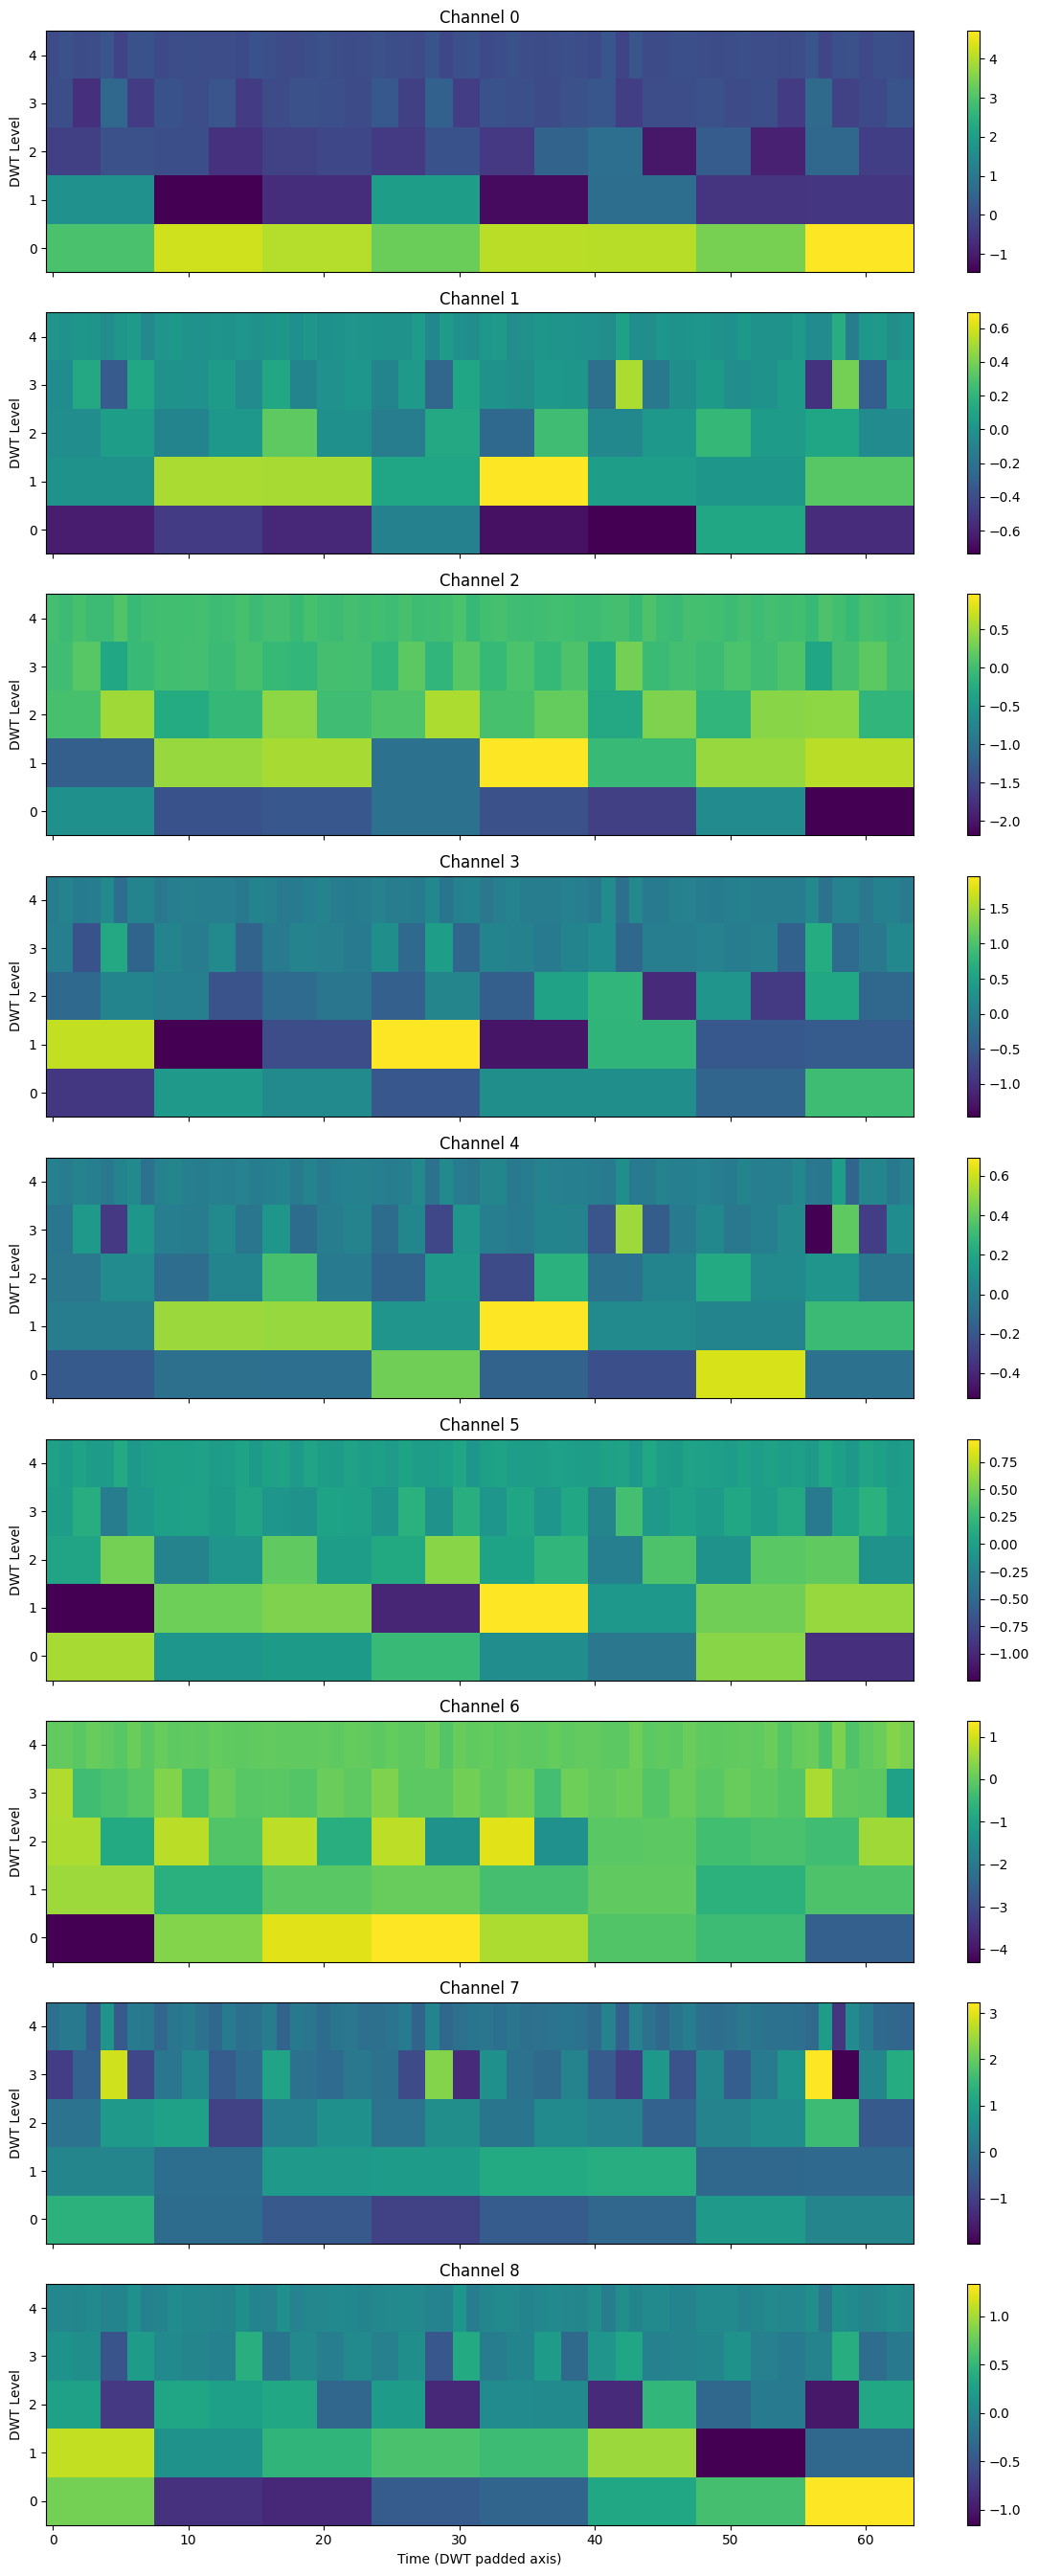

TypeError: only integer tensors of a single element can be converted to an index

In [11]:
from whar_datasets.core.features.wavelet_transform import (
    dtw_grid_to_signal,
    plot_dwt_grid,
)


y, grid, lengths = next(iter(train_loader))
print(y.shape, grid.shape, lengths.shape)


plot_dwt_grid(grid[0])

signal_recon = dtw_grid_to_signal(grid[0], lengths[0])
plt.plot(signal_recon)

(6, 6, 128)


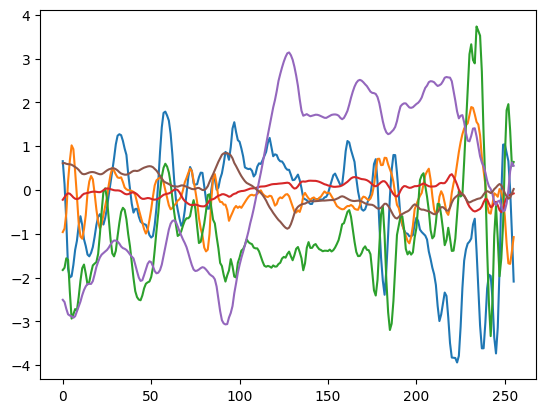

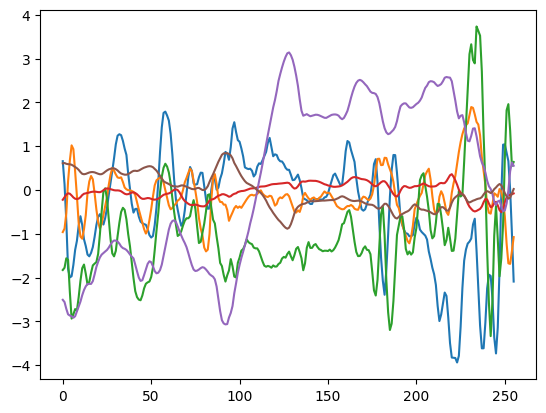

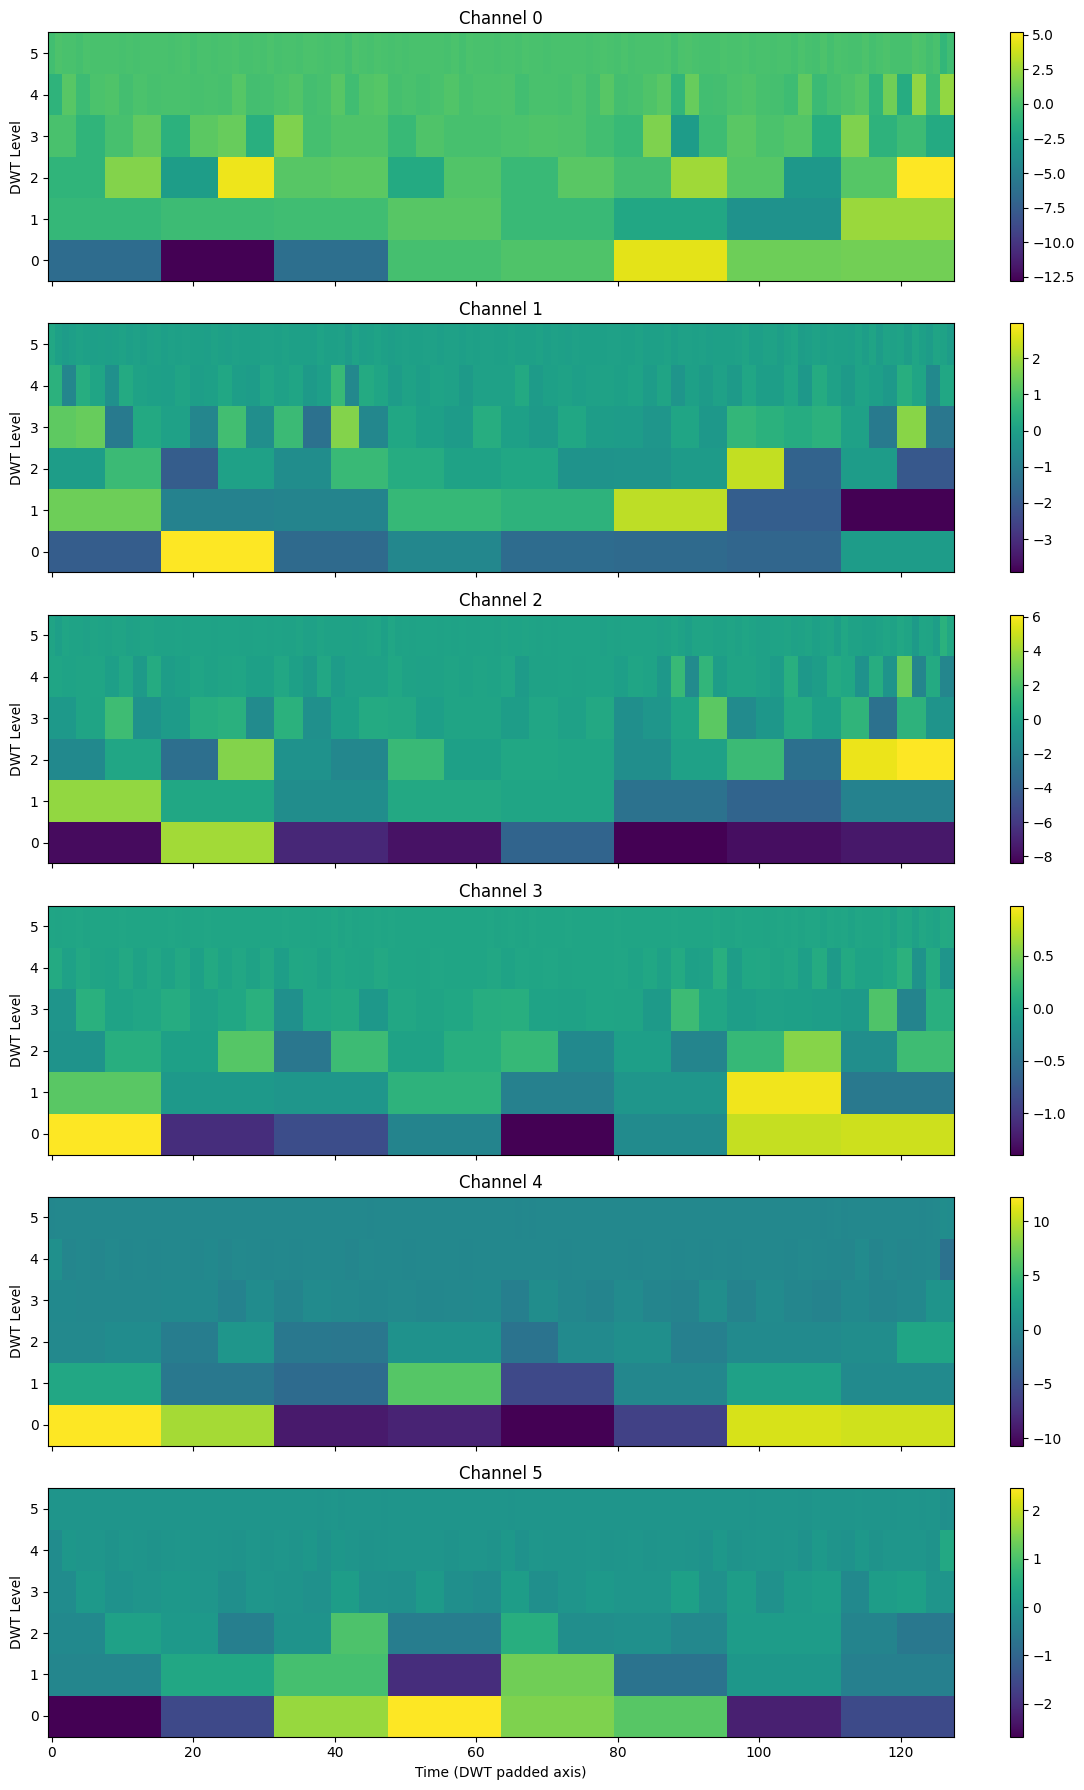

In [ ]:
from whar_datasets.core.features.wavelet_transform import (
    plot_dwt_grid,
    signal_to_dwt_grid,
    dtw_grid_to_signal,
)


# Example usage
signal = x[0]

grid, lengths = signal_to_dwt_grid(signal)
print(grid.shape)
signal_recon = dtw_grid_to_signal(grid, lengths)

plt.plot(signal)
plt.show()
plt.plot(signal_recon)
plt.show()

plot_dwt_grid(grid)